In [5]:
library(cluster)
library(factoextra)
library(dplyr)

In [6]:
House_2012 <- read.csv("House_2012.csv")
house2012.dat <- House_2012[c(-1,-2,-3,-4)]
house2012.dat <- mutate_all(house2012.dat, function(x) as.numeric(as.character(x)))
house2012.dat <- house2012.dat[ -which(apply(house2012.dat, 2, var)==0)]


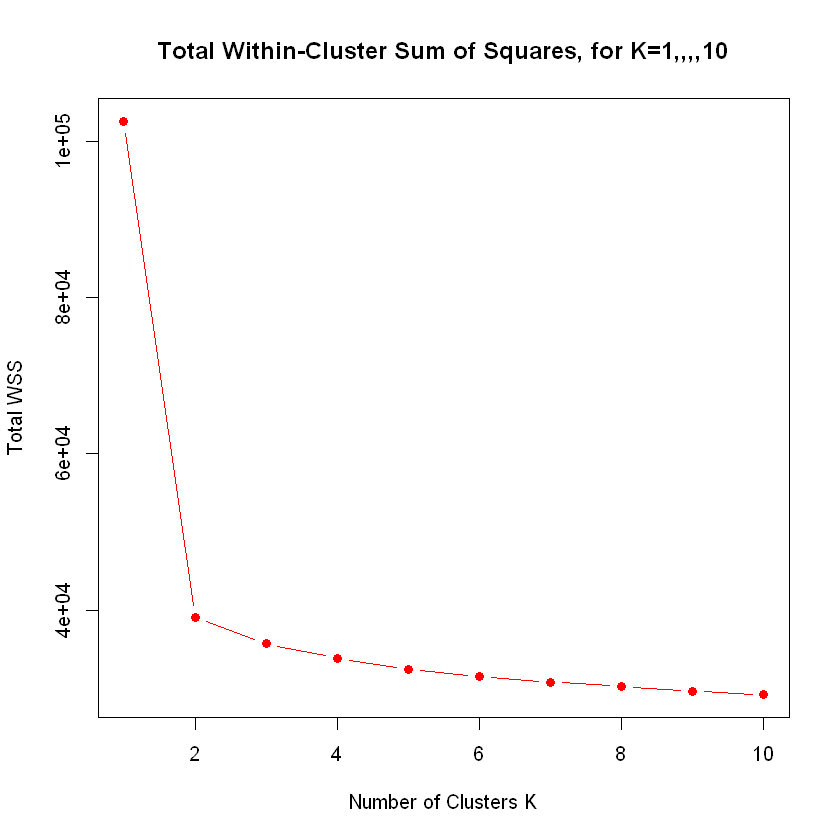

In [7]:
wss <- numeric(10)
for (k in 1:10){
  wss[k] <- eclust(house2012.dat, 
                   FUNcluster = "kmeans", 
                   k=k,
                   nstart=50,
                   graph=0)$tot.withinss
}

# Plot WSS for k = 1,,,10
plot(wss,
     type="b",
     pch=19,
     col=2,
     main = "Total Within-Cluster Sum of Squares, for K=1,,,,10",
     xlab = "Number of Clusters K",
     ylab = "Total WSS")


   
      D   R
  1 194   1
  2   3 242

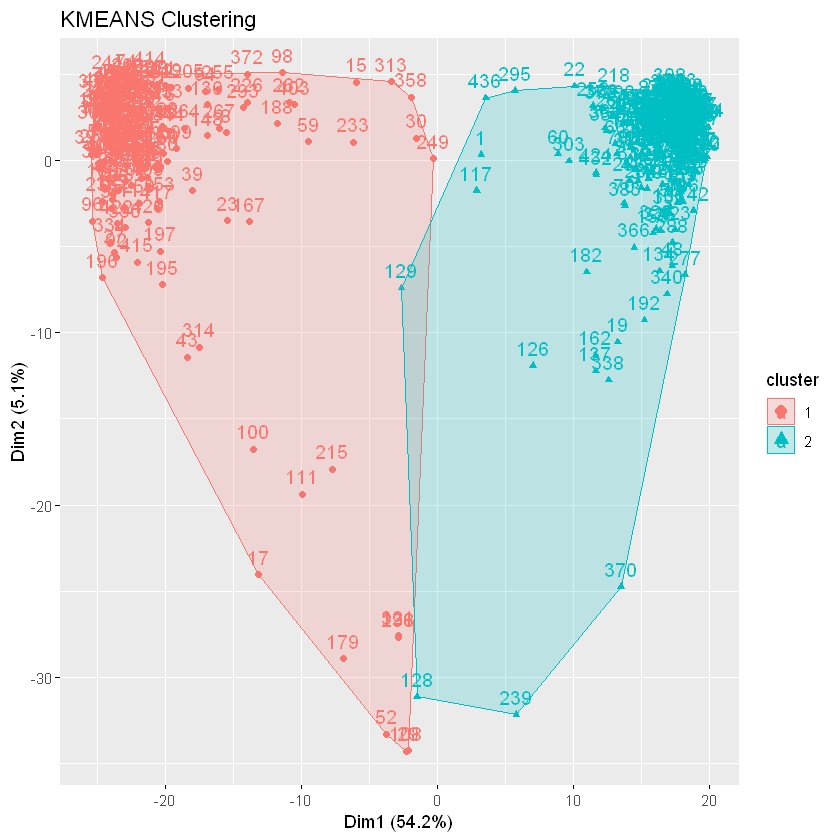

In [8]:
house.kmeans <- eclust(house2012.dat,FUNcluster = "kmeans",k=2, nstart=50,graph=TRUE)
table(house.kmeans$cluster,House_2012$party)

In [9]:
house.kmeans$silinfo$avg.width

[1] 0.5235874

In [10]:
cluster1 <- House_2012[which(house.kmeans$cluster == 1),c(1,2,3,4)]
cluster1[which(cluster1$party == 'R'),]

,ï..id,display_name,party,state
29,B000589,Boehner,R,OH


In [11]:
cluster2 <- House_2012[which(house.kmeans$cluster == 2),c(1,2,3,4)]
cluster2[which(cluster2$party == 'D'),]

,ï..id,display_name,party,state
1,B001254,Boren,D,OK
129,S001171,Shuler,D,NC
295,M001142,Matheson,D,UT
